In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('../data/mvc_data.csv')  # available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

C:\Users\mimi_\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036734,07/03/2023,18:05,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2036735,07/22/2023,21:39,BRONX,10457,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2036736,07/02/2023,17:55,MANHATTAN,10006,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2036737,07/22/2023,13:15,QUEENS,11433,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036739 entries, 0 to 2036738
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [5]:
data.isnull()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,False,False,True,True,True,True,True,False,False,True,...,False,True,True,True,False,False,False,True,True,True
1,False,False,True,True,True,True,True,False,True,True,...,True,True,True,True,False,False,True,True,True,True
2,False,False,True,True,True,True,True,False,True,True,...,False,True,True,True,False,False,False,True,True,True
3,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036734,False,False,True,True,False,False,False,False,True,True,...,False,True,True,True,False,False,False,True,True,True
2036735,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,False,False,True,True,True,True
2036736,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,False,False,True,True,True,True
2036737,False,False,False,False,False,False,False,False,False,True,...,False,True,True,True,False,False,False,True,True,True


In [6]:
data.isnull().sum() / len(data)

CRASH DATE                       0.000000
CRASH TIME                       0.000000
BOROUGH                          0.311109
ZIP CODE                         0.311227
LATITUDE                         0.113467
LONGITUDE                        0.113467
LOCATION                         0.113467
ON STREET NAME                   0.211078
CROSS STREET NAME                0.375555
OFF STREET NAME                  0.834275
NUMBER OF PERSONS INJURED        0.000009
NUMBER OF PERSONS KILLED         0.000015
NUMBER OF PEDESTRIANS INJURED    0.000000
NUMBER OF PEDESTRIANS KILLED     0.000000
NUMBER OF CYCLIST INJURED        0.000000
NUMBER OF CYCLIST KILLED         0.000000
NUMBER OF MOTORIST INJURED       0.000000
NUMBER OF MOTORIST KILLED        0.000000
CONTRIBUTING FACTOR VEHICLE 1    0.003179
CONTRIBUTING FACTOR VEHICLE 2    0.153228
CONTRIBUTING FACTOR VEHICLE 3    0.928911
CONTRIBUTING FACTOR VEHICLE 4    0.984025
CONTRIBUTING FACTOR VEHICLE 5    0.995675
COLLISION_ID                     0

<AxesSubplot:>

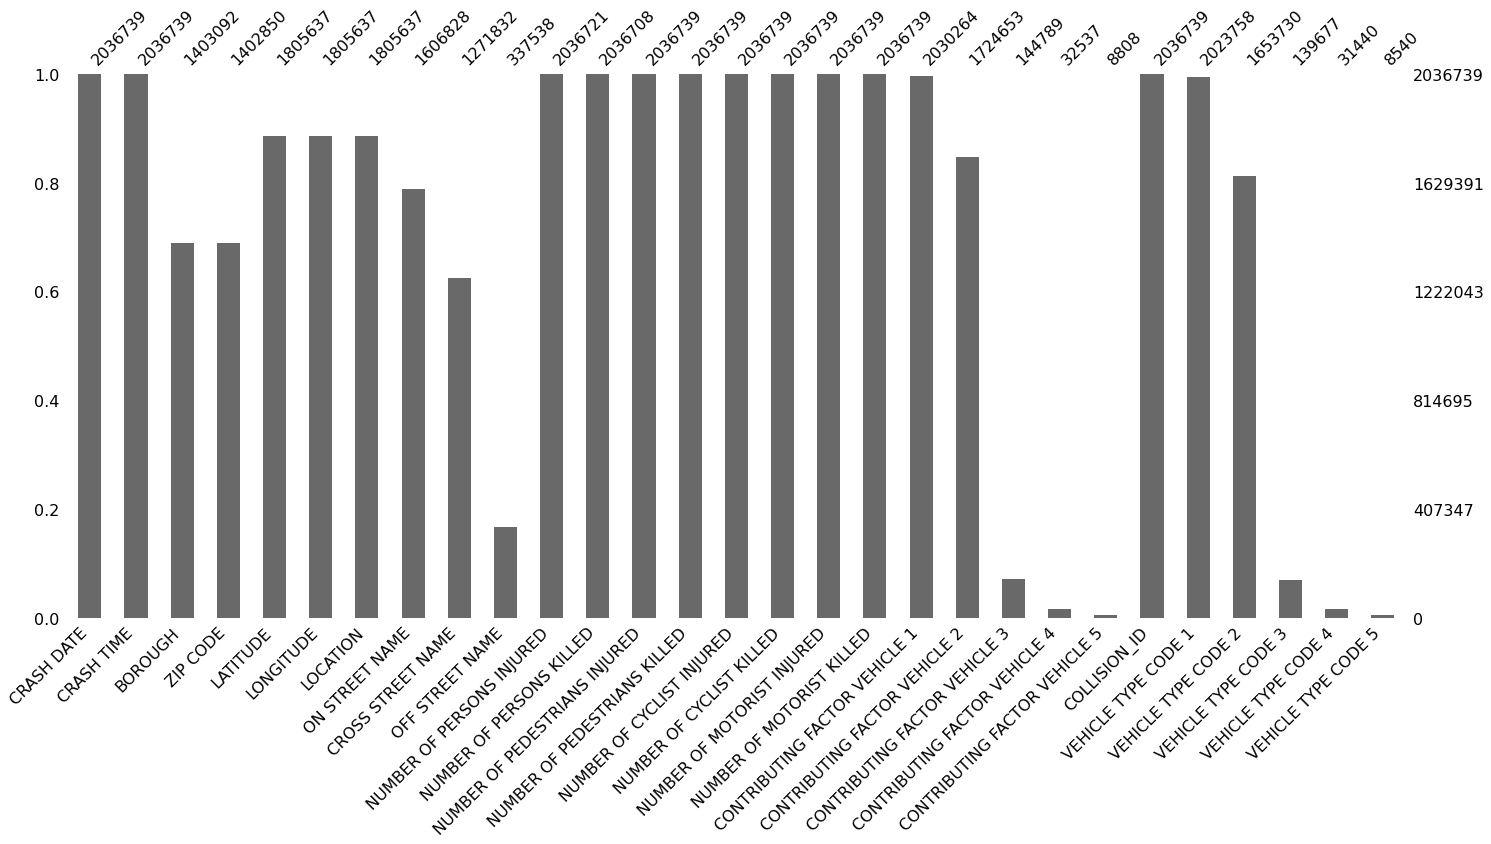

In [7]:
msno.bar(data)

<AxesSubplot:>

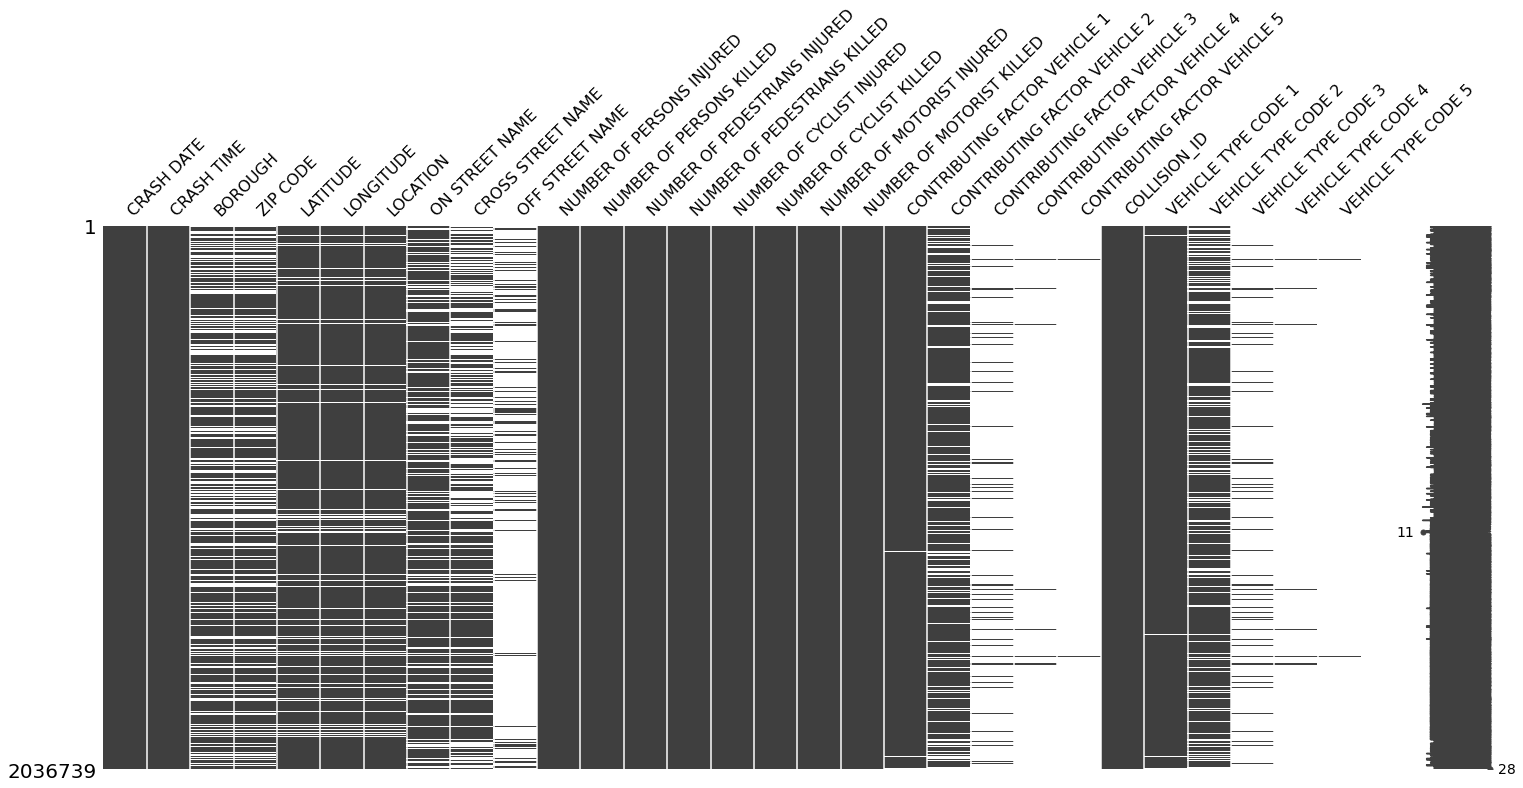

In [8]:
msno.matrix(data)

<AxesSubplot:>

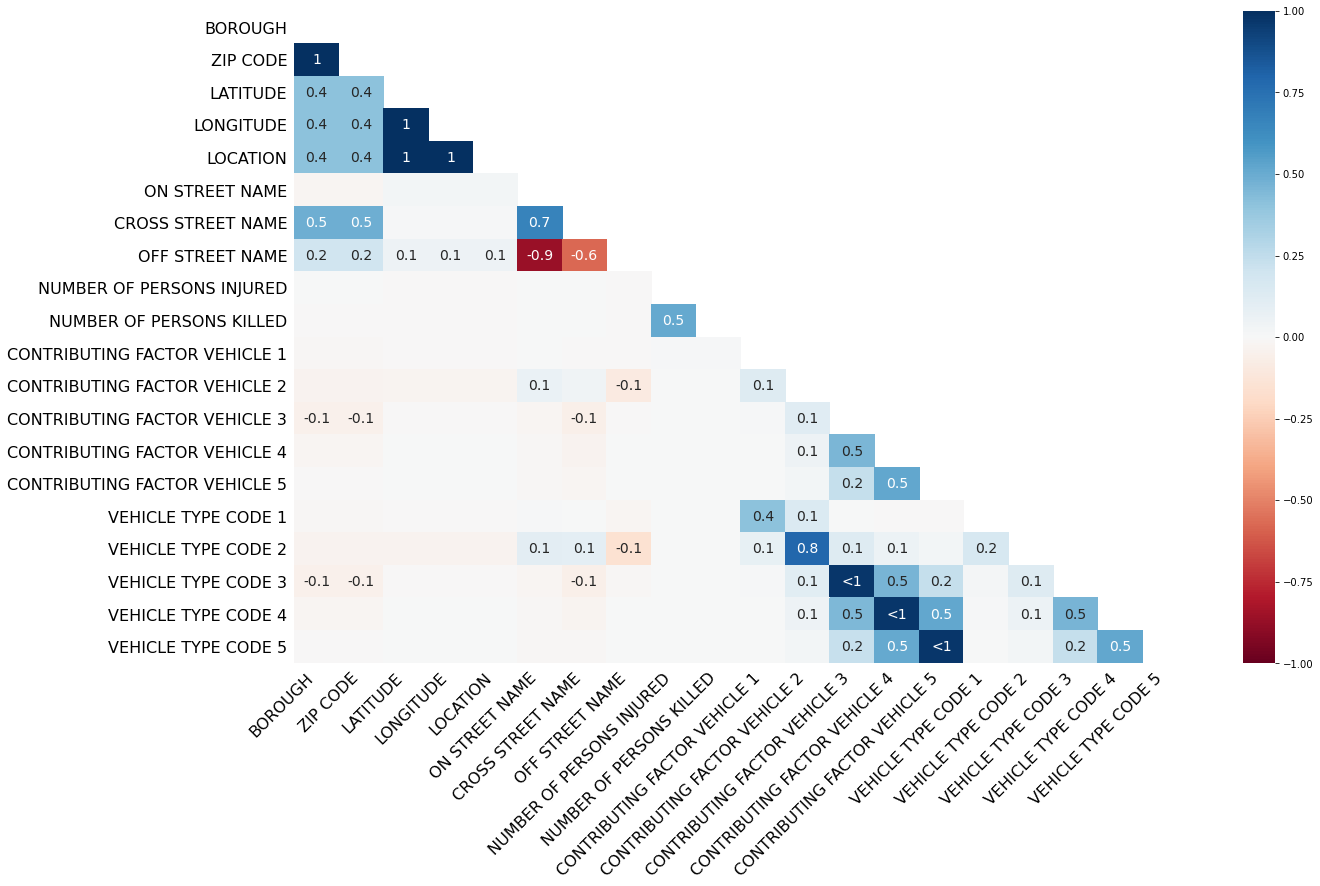

In [9]:
msno.heatmap(data)

# Handling missing values

### When should you remove columns?

In [17]:
data = data.drop(columns=['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'OFF STREET NAME'])

In [18]:
data.isnull().sum() / len(data)

CRASH DATE                       0.000000
CRASH TIME                       0.000000
BOROUGH                          0.311109
ZIP CODE                         0.311227
LATITUDE                         0.113467
LONGITUDE                        0.113467
LOCATION                         0.113467
ON STREET NAME                   0.211078
CROSS STREET NAME                0.375555
NUMBER OF PERSONS INJURED        0.000009
NUMBER OF PERSONS KILLED         0.000015
NUMBER OF PEDESTRIANS INJURED    0.000000
NUMBER OF PEDESTRIANS KILLED     0.000000
NUMBER OF CYCLIST INJURED        0.000000
NUMBER OF CYCLIST KILLED         0.000000
NUMBER OF MOTORIST INJURED       0.000000
NUMBER OF MOTORIST KILLED        0.000000
CONTRIBUTING FACTOR VEHICLE 1    0.003179
CONTRIBUTING FACTOR VEHICLE 2    0.153228
COLLISION_ID                     0.000000
VEHICLE TYPE CODE 1              0.006373
VEHICLE TYPE CODE 2              0.188050
dtype: float64

### When should you drop rows?

In [19]:
data = data.dropna(subset=['VEHICLE TYPE CODE 1'], axis=0)

In [20]:
data.isnull().sum() / len(data)

CRASH DATE                       0.000000
CRASH TIME                       0.000000
BOROUGH                          0.311514
ZIP CODE                         0.311634
LATITUDE                         0.113629
LONGITUDE                        0.113629
LOCATION                         0.113629
ON STREET NAME                   0.210795
CROSS STREET NAME                0.375339
NUMBER OF PERSONS INJURED        0.000008
NUMBER OF PERSONS KILLED         0.000013
NUMBER OF PEDESTRIANS INJURED    0.000000
NUMBER OF PEDESTRIANS KILLED     0.000000
NUMBER OF CYCLIST INJURED        0.000000
NUMBER OF CYCLIST KILLED         0.000000
NUMBER OF MOTORIST INJURED       0.000000
NUMBER OF MOTORIST KILLED        0.000000
CONTRIBUTING FACTOR VEHICLE 1    0.001341
CONTRIBUTING FACTOR VEHICLE 2    0.149128
COLLISION_ID                     0.000000
VEHICLE TYPE CODE 1              0.000000
VEHICLE TYPE CODE 2              0.182847
dtype: float64

## Imputation - We want to keep as much data as possible, so we fill the values

In [10]:
data_titanic = pd.read_csv('./data/spaceship_titanic.csv')

In [11]:
data_titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [12]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
data_titanic.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
data_titanic.isnull().sum() / len(data_titanic)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

<AxesSubplot:>

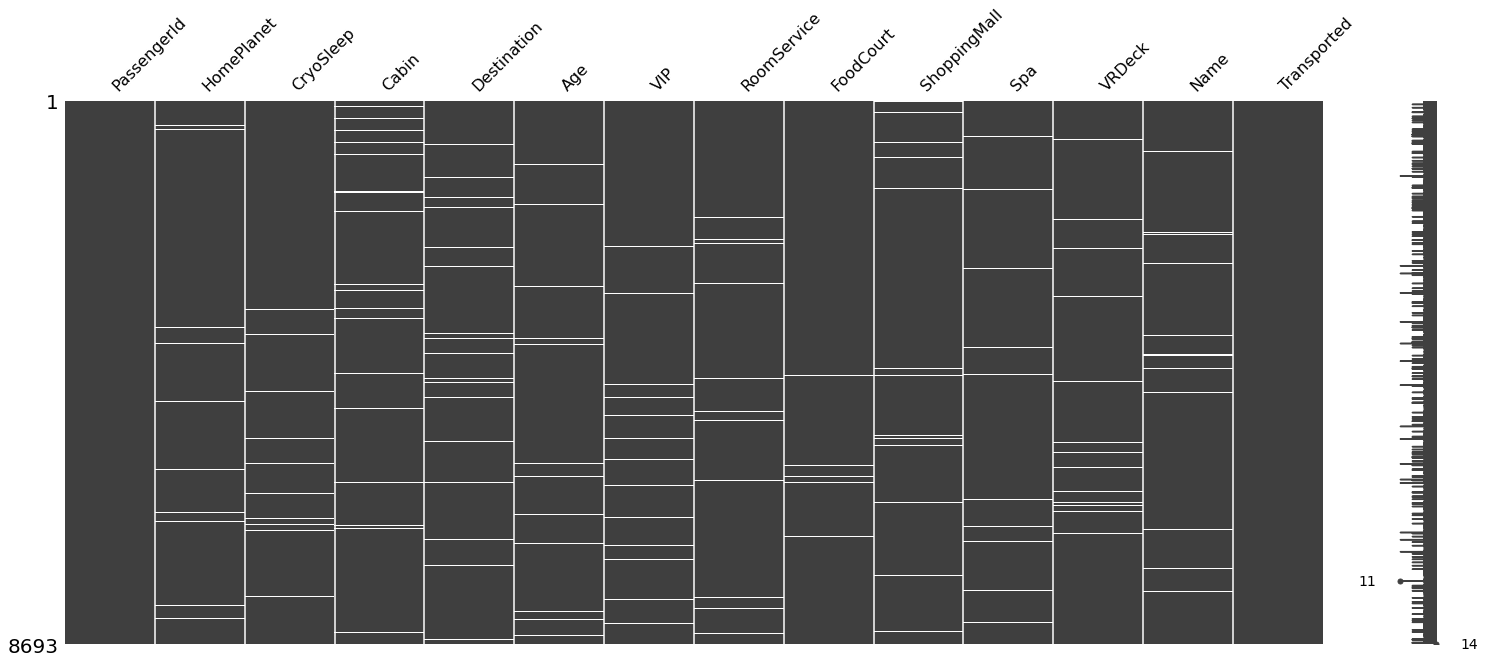

In [15]:
msno.matrix(data_titanic)

<AxesSubplot:>

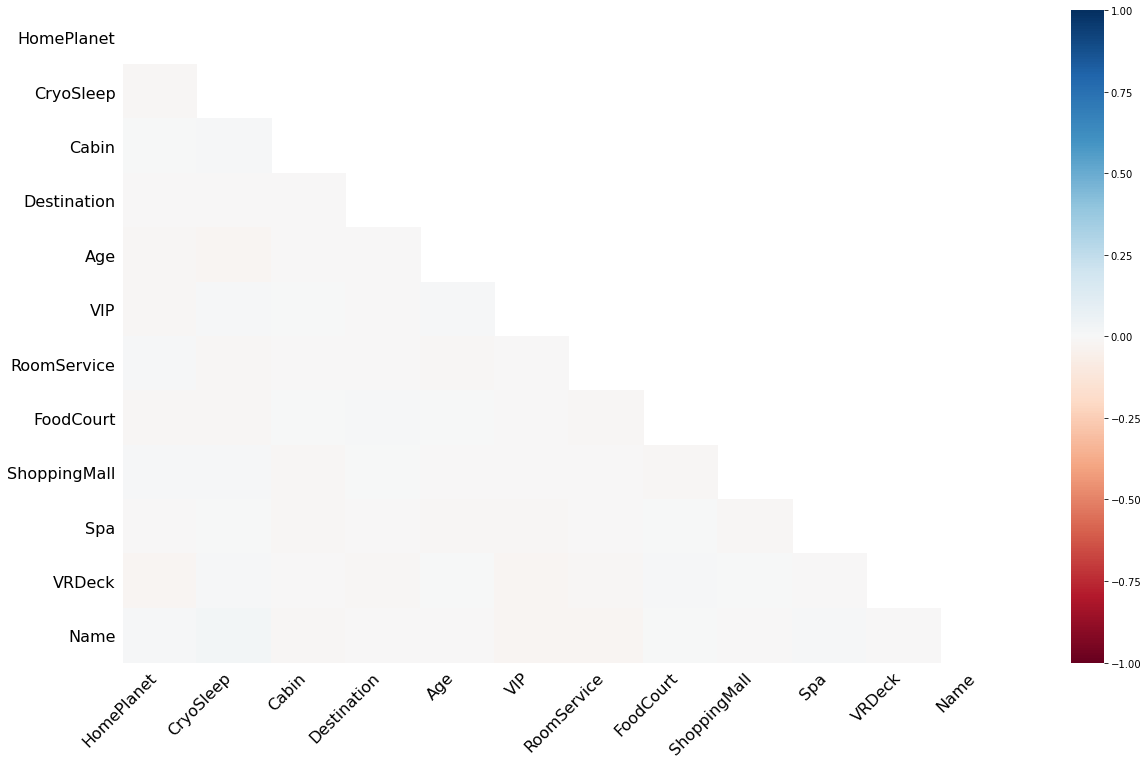

In [16]:
msno.heatmap(data_titanic)

## Fill the values with some statistic (mean, median)

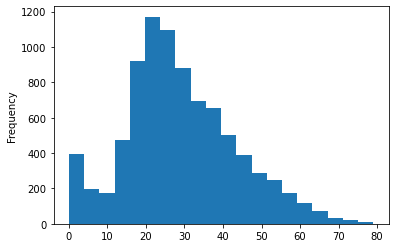

In [22]:
data_titanic['Age'].plot.hist(bins=20)
plt.show()

In [23]:
data_titanic['Age'].median()

27.0

In [24]:
data_titanic['Age'] = data_titanic['Age'].fillna(value=data_titanic['Age'].median())

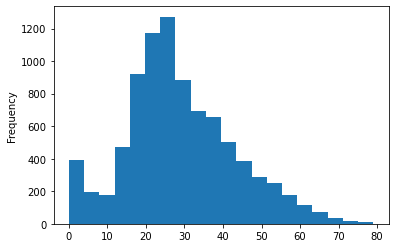

In [25]:
data_titanic['Age'].plot.hist(bins=20)
plt.show()

In [28]:
data_titanic['Age'].isnull().sum()

0

## Fill the values with a constant

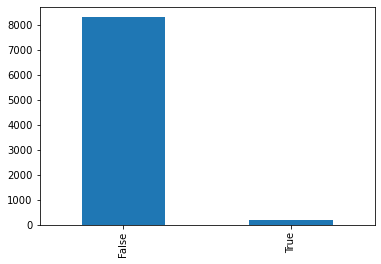

In [29]:
data_titanic['VIP'].value_counts().plot.bar()
plt.show()

In [30]:
imputer = SimpleImputer(strategy = 'constant',  fill_value = False)

In [31]:
data_titanic['VIP'] = imputer.fit_transform([data_titanic['VIP']])[0]

In [32]:
data_titanic['VIP'].isnull().sum()

0

### Alternative

In [33]:
# data_titanic['VIP'] = data_titanic['VIP'].fillna(value=False)

## Fill the data with the most frequent category

<AxesSubplot:>

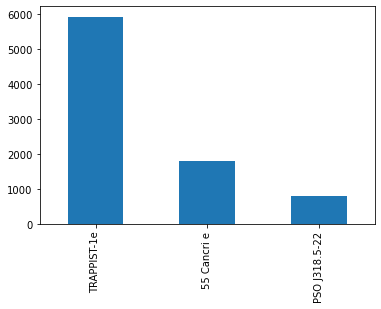

In [34]:
data_titanic.Destination.value_counts().plot.bar()

In [35]:
data_titanic.Destination = data_titanic.Destination.astype(str)

In [36]:
imputer = SimpleImputer(strategy='most_frequent')

In [37]:
data_titanic['Destination'] = imputer.fit_transform([data_titanic['Destination']])[0]

In [40]:
data_titanic.Destination.isnull().sum()

0

## KNN-imputation

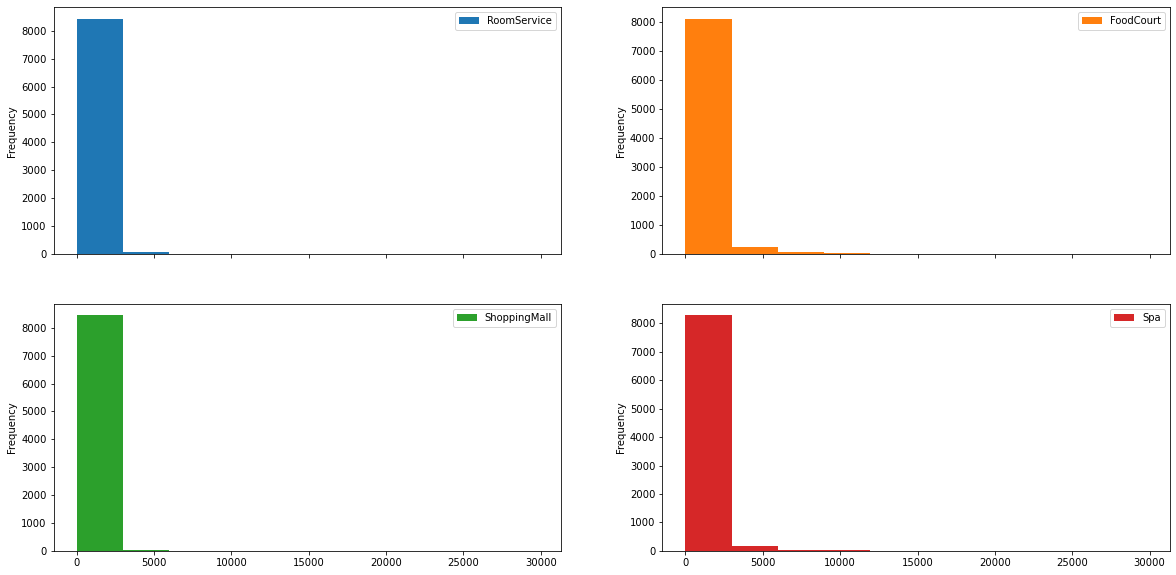

In [46]:
data_titanic[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']].plot.hist(figsize=(20, 10), subplots=True, layout=(2,2))
plt.show()

In [54]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_titanic[['RoomService', 'FoodCourt', 'ShoppingMall']])

In [55]:
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = knn_imputer.fit_transform(scaled_data)
data_titanic[['RoomService', 'FoodCourt', 'ShoppingMall']] = scaler.inverse_transform(imputed_data)

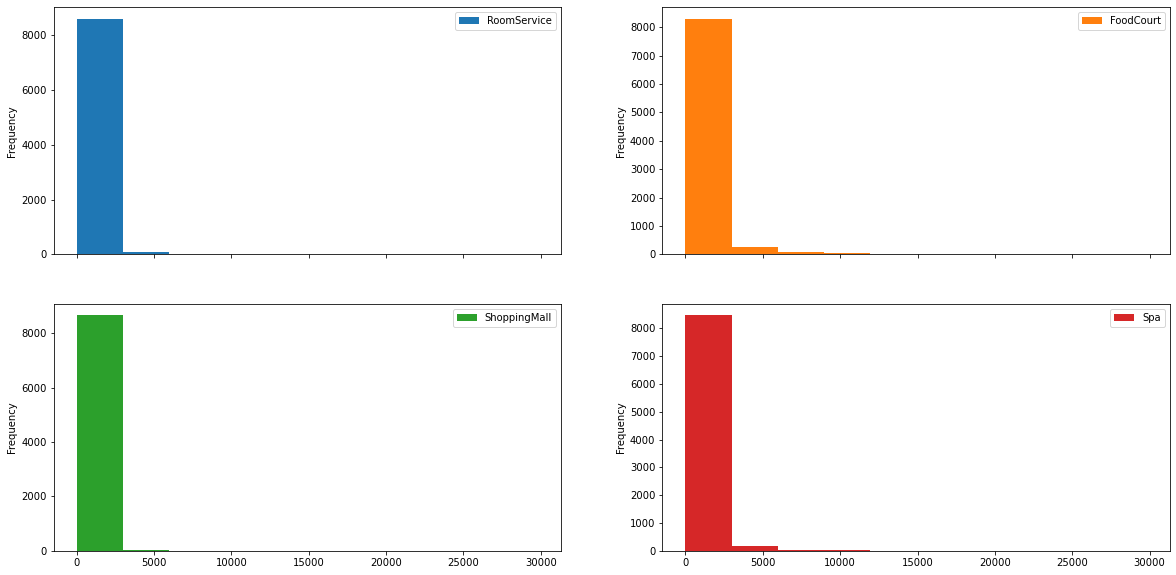

In [49]:
data_titanic[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']].plot.hist(figsize=(20, 10), subplots=True, layout=(2,2))
plt.show()

In [50]:
data_titanic.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck          188
Name            200
Transported       0
dtype: int64

## Iterative Imputation (MICE)

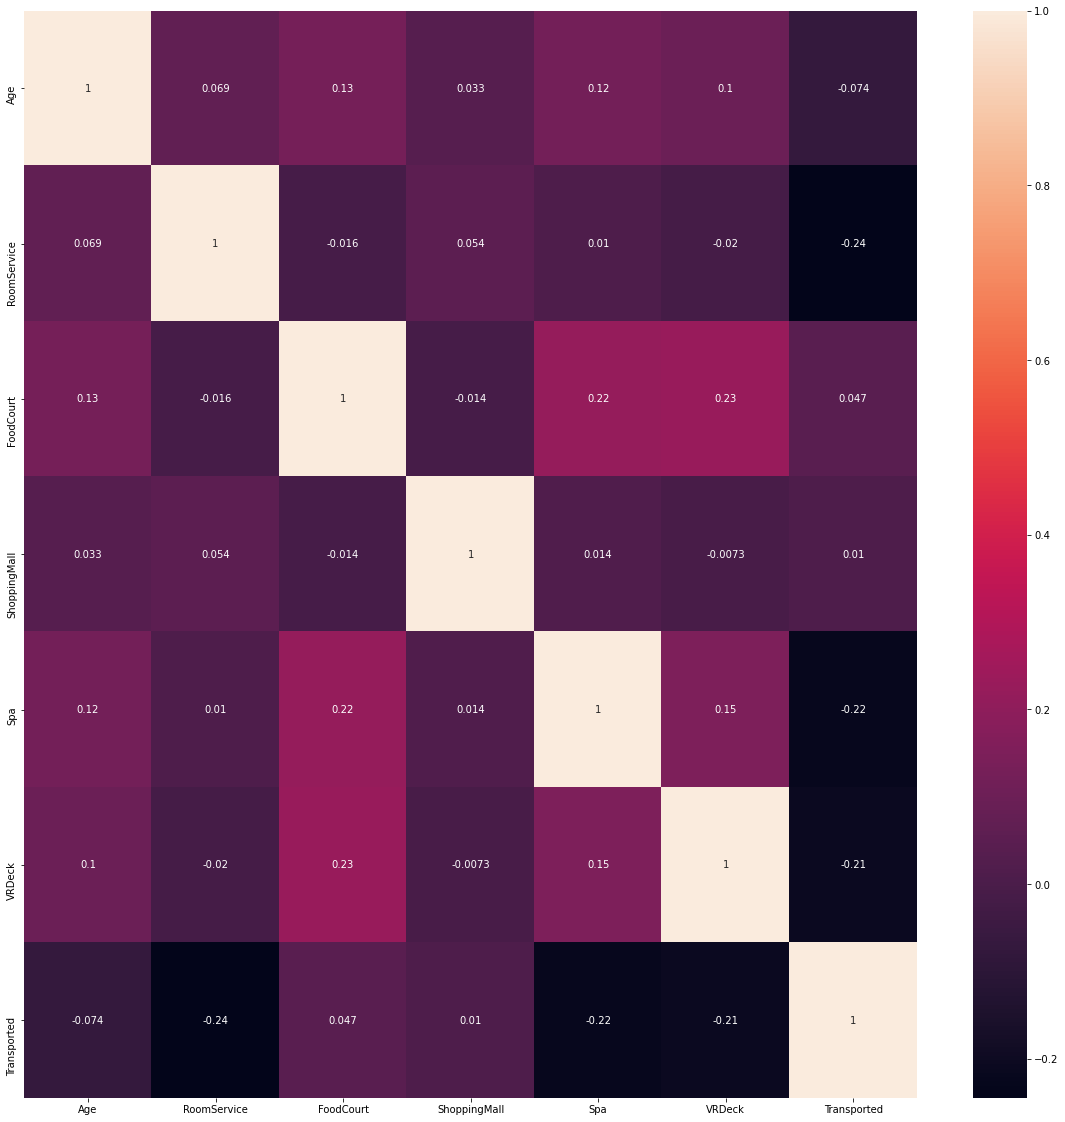

In [41]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_titanic.corr(), annot=True)
plt.show()

In [56]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()
data_titanic[['VRDeck',  'Spa']] = mice_imputer.fit_transform(data_titanic[['VRDeck', 'Spa']])

In [57]:
data_titanic.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

## Time-series

In [130]:
air_quality_data = pd.read_csv('../data/air_quality_missing.csv')

In [131]:
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647437 non-null  float64
 6   NO2               647421 non-null  float64
 7   O3                647436 non-null  float64
 8   CO                647397 non-null  float64
 9   PM10              647416 non-null  float64
 10  PM2.5             647433 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [132]:
air_quality_data.isnull().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                  74
NO2                  90
O3                   75
CO                  114
PM10                 95
PM2.5                78
dtype: int64

In [133]:
air_quality_data.head(50)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,73.0,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,71.0,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,70.0,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,NaN,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.2,NaN,61.0
5,1/1/2017 5:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.1,NaN,61.0
6,1/1/2017 6:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.1,NaN,57.0
7,1/1/2017 7:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.045,0.002,1.0,NaN,60.0
8,1/1/2017 8:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.047,0.002,1.1,NaN,60.0
9,1/1/2017 9:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.047,0.002,1.1,NaN,63.0


In [134]:
air_quality_data.tail(20)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647491,12/31/2019 4:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.010,0.023,0.4,42.0,34.0
647492,12/31/2019 5:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.011,0.023,0.4,31.0,24.0
647493,12/31/2019 6:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.021,0.4,28.0,22.0
647494,12/31/2019 7:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.018,0.019,0.4,25.0,19.0
647495,12/31/2019 8:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.019,0.019,0.4,25.0,17.0
647496,12/31/2019 9:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.017,0.020,0.4,20.0,13.0
647497,12/31/2019 10:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.014,0.023,0.4,20.0,11.0
647498,12/31/2019 11:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.014,0.023,0.4,18.0,13.0
647499,12/31/2019 12:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,19.0,14.0
647500,12/31/2019 13:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.015,0.023,0.4,22.0,15.0


In [135]:
air_quality_data['NO2'] = air_quality_data['NO2'].fillna(method='bfill')

In [136]:
air_quality_data.isnull().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                  74
NO2                   0
O3                   75
CO                  114
PM10                 95
PM2.5                78
dtype: int64

In [137]:
air_quality_data['CO'] = air_quality_data['CO'].fillna(method='ffill')

In [138]:
air_quality_data.tail(50)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
647461,12/29/2019 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.041,0.006,0.6,48.0,35.0
647462,12/29/2019 23:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.039,0.005,0.6,42.0,29.0
647463,12/30/2019 0:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.5,38.0,28.0
647464,12/30/2019 1:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.021,0.016,0.5,33.0,24.0
647465,12/30/2019 2:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.020,0.017,0.5,34.0,24.0
647466,12/30/2019 3:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.019,0.017,0.5,32.0,24.0
647467,12/30/2019 4:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.002,0.023,0.014,0.5,32.0,23.0
647468,12/30/2019 5:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.034,0.005,0.6,32.0,23.0
647469,12/30/2019 6:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.035,0.004,0.6,35.0,27.0
647470,12/30/2019 7:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.043,0.002,0.6,35.0,27.0


In [140]:
air_quality_data['PM10'] = air_quality_data['PM10'].interpolate(limit_direction='both')

In [141]:
air_quality_data.head(50)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,73.000000,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,71.000000,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,70.000000,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.049,0.002,1.2,72.181818,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.2,74.363636,61.0
5,1/1/2017 5:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.1,76.545455,61.0
6,1/1/2017 6:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.049,0.002,1.1,78.727273,57.0
7,1/1/2017 7:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.045,0.002,1.0,80.909091,60.0
8,1/1/2017 8:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.047,0.002,1.1,83.090909,60.0
9,1/1/2017 9:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.047,0.002,1.1,85.272727,63.0


# Label encoding

In [58]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [59]:
encoder = LabelEncoder()

In [60]:
data_titanic['LabelDestination'] = encoder.fit_transform(data_titanic['Destination'])

In [61]:
data_titanic[['Destination', 'LabelDestination']]

,Destination,LabelDestination
0,TRAPPIST-1e,2
1,TRAPPIST-1e,2
2,TRAPPIST-1e,2
3,TRAPPIST-1e,2
4,TRAPPIST-1e,2
...,...,...
8688,55 Cancri e,0
8689,PSO J318.5-22,1
8690,TRAPPIST-1e,2
8691,55 Cancri e,0


In [62]:
onehot_encoder = OneHotEncoder()

In [63]:
encoding_df = pd.DataFrame(onehot_encoder.fit_transform(data_titanic[['Destination']]).toarray())

In [64]:
pd.concat([data_titanic, encoding_df], axis=1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,LabelDestination,0,1,2,3
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,2,0.0,0.0,1.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,0.0,0.0,1.0,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,0.0,0.0,1.0,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,0.0,0.0,1.0,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,2,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1.0,0.0,0.0,0.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,0.0,1.0,0.0,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,2,0.0,0.0,1.0,0.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,1.0,0.0,0.0,0.0
